### 통계적 검정(카이제곱)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_fin.csv')
df.head()

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0


In [3]:
# 상온 Aging #1
cross_tab_col = pd.crosstab(df['rta1_box_col'], df['judge'])
cross_tab_row = pd.crosstab(df['rta1_box_row'], df['judge'])
cross_tab_dan = pd.crosstab(df['rta1_box_dan'], df['judge'])

In [4]:
import scipy.stats as stats
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_row, p_row, dof_row, ex_row = stats.chi2_contingency(cross_tab_row)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [5]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_row))
print("{:.3f}".format(p_dan))

0.007
0.000
0.000


모두 0.05 이하로 유의미함. 특히 row와 dan의 크기가 작음

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/a고딕13.ttf' # 폰트가 있는 곳
font_name = font_manager.FontProperties(fname = font_path).get_name()

rc('font', family = font_name)

Text(114.84375, 0.5, '단')

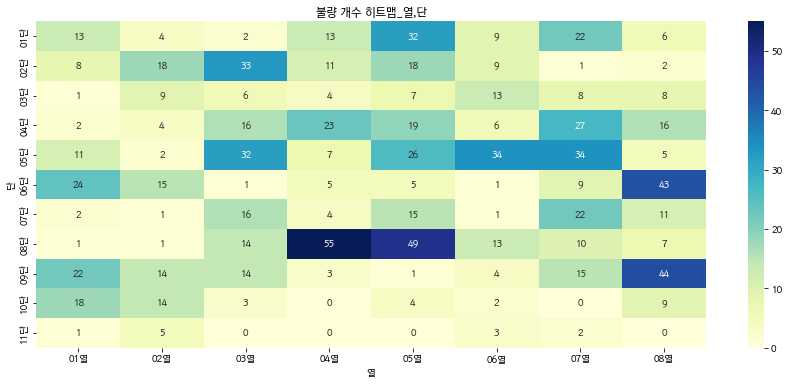

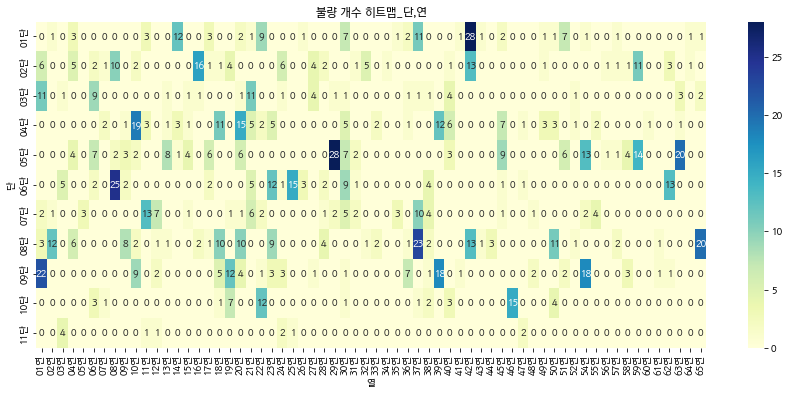

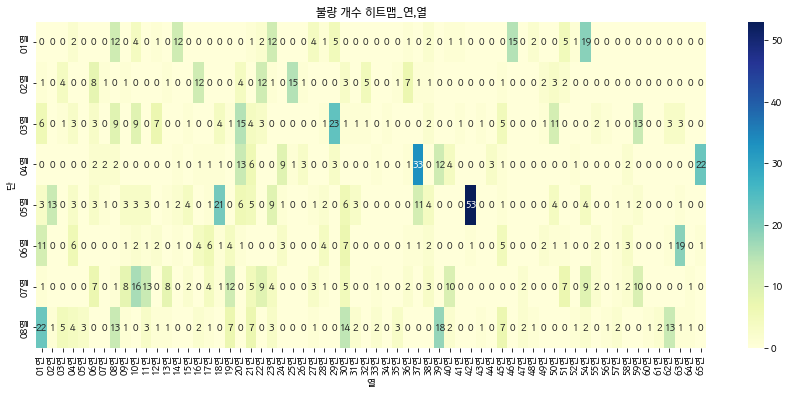

In [7]:
pivot_table_cd = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['rta1_box_dan'], columns=['rta1_box_col'], 
                                    aggfunc='count', fill_value=0)
pivot_table_rd = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['rta1_box_dan'], columns=['rta1_box_row'], 
                                    aggfunc='count', fill_value=0)
pivot_table_rc = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['rta1_box_col'], columns=['rta1_box_row'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_cd , annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_열,단')
plt.xlabel('열')
plt.ylabel('단')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_rd, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_단,연')
plt.xlabel('열')
plt.ylabel('단')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_rc, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_연,열')
plt.xlabel('열')
plt.ylabel('단')

In [8]:
# 고온 Aging #1
cross_tab_col = pd.crosstab(df['hta1_box_col'], df['judge'])
cross_tab_row = pd.crosstab(df['hta1_box_row'], df['judge'])
cross_tab_dan = pd.crosstab(df['hta1_box_dan'], df['judge'])

In [9]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_row, p_row, dof_row, ex_row = stats.chi2_contingency(cross_tab_row)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [10]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_row))
print("{:.3f}".format(p_dan))

0.000
0.000
0.000


Text(115.0, 0.5, '단')

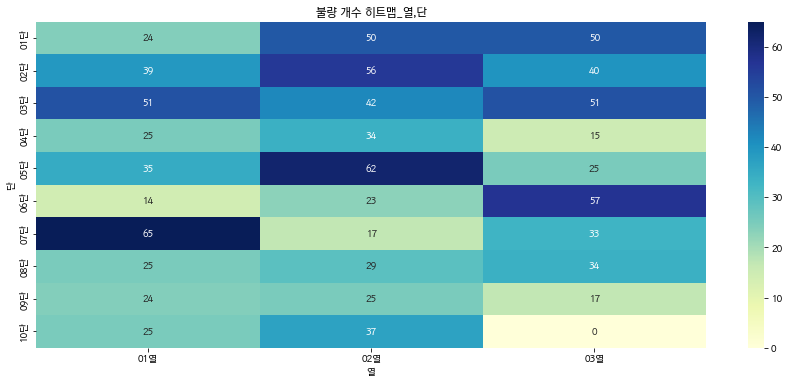

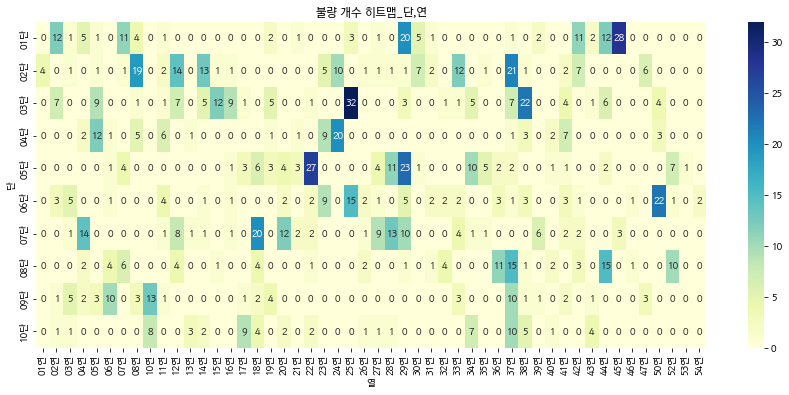

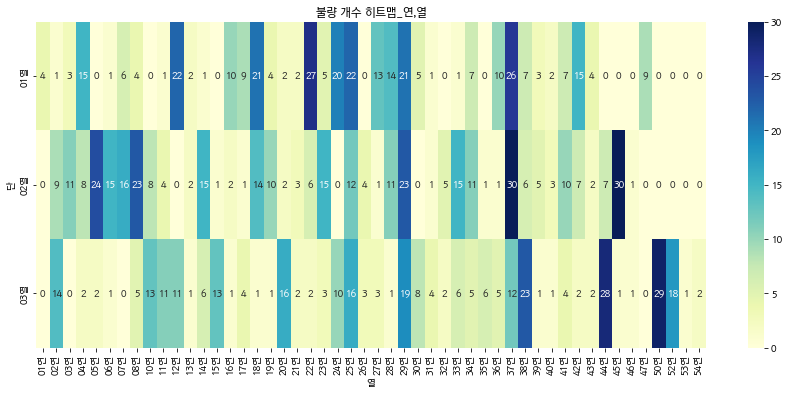

In [11]:
pivot_table_cd = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['hta1_box_dan'], columns=['hta1_box_col'], 
                                    aggfunc='count', fill_value=0)
pivot_table_rd = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['hta1_box_dan'], columns=['hta1_box_row'], 
                                    aggfunc='count', fill_value=0)
pivot_table_rc = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['hta1_box_col'], columns=['hta1_box_row'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_cd , annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_열,단')
plt.xlabel('열')
plt.ylabel('단')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_rd, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_단,연')
plt.xlabel('열')
plt.ylabel('단')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_rc, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_연,열')
plt.xlabel('열')
plt.ylabel('단')

In [12]:
# 상온 Aging #2
cross_tab_col = pd.crosstab(df['rta2_box_col'], df['judge'])
cross_tab_row = pd.crosstab(df['rta2_box_row'], df['judge'])
cross_tab_dan = pd.crosstab(df['rta2_box_dan'], df['judge'])

In [13]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_row, p_row, dof_row, ex_row = stats.chi2_contingency(cross_tab_row)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [14]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_row))
print("{:.3f}".format(p_dan))

0.000
0.000
0.000


Text(114.84375, 0.5, '단')

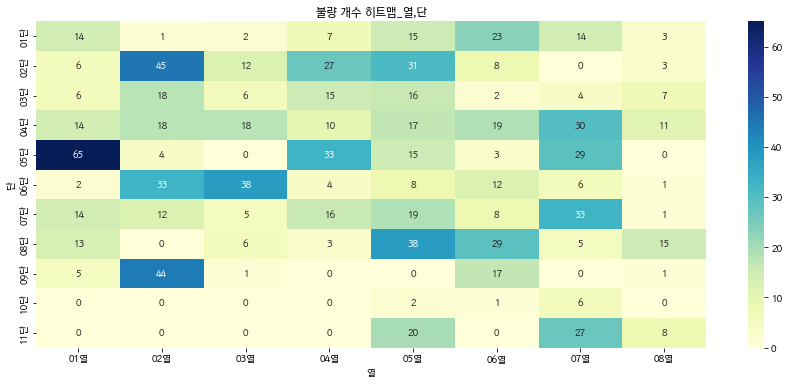

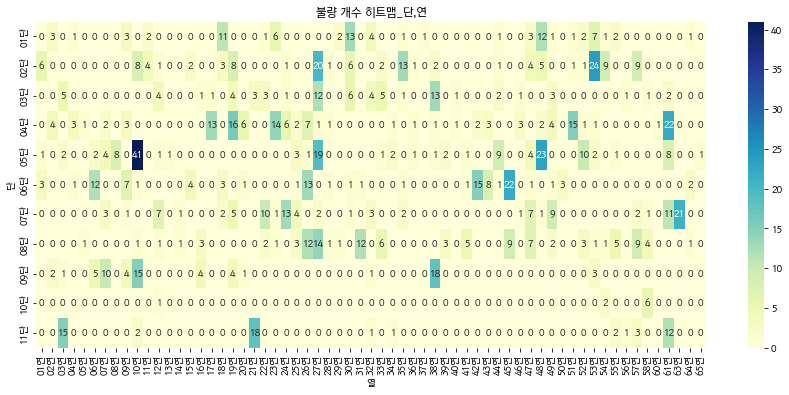

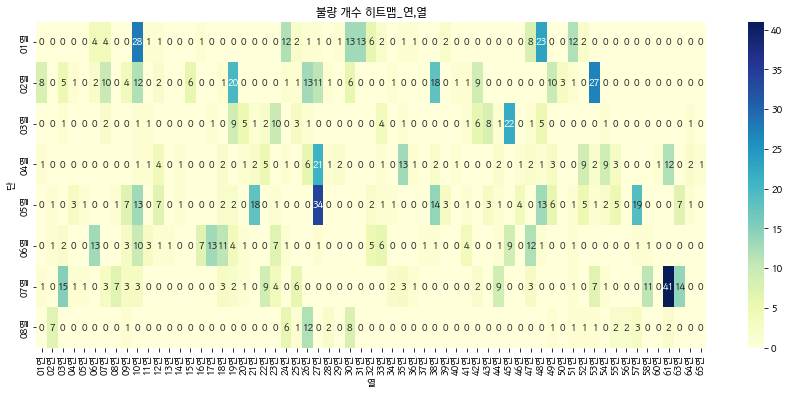

In [15]:
pivot_table_cd = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['rta2_box_dan'], columns=['rta2_box_col'], 
                                    aggfunc='count', fill_value=0)
pivot_table_rd = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['rta2_box_dan'], columns=['rta2_box_row'], 
                                    aggfunc='count', fill_value=0)
pivot_table_rc = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['rta2_box_col'], columns=['rta2_box_row'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_cd , annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_열,단')
plt.xlabel('열')
plt.ylabel('단')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_rd, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_단,연')
plt.xlabel('열')
plt.ylabel('단')

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_rc, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵_연,열')
plt.xlabel('열')
plt.ylabel('단')

In [16]:
# 충방전 공정
cross_tab_col = pd.crosstab(df['c1_box_col'], df['judge'])
cross_tab_dan = pd.crosstab(df['c1_box_dan'], df['judge'])

In [17]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [18]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_dan))

0.000
0.000


Text(114.84375, 0.5, '단')

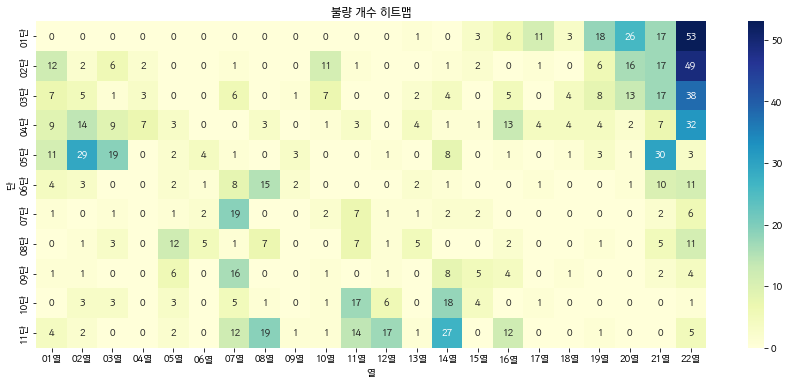

In [19]:
pivot_table_defect = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['c1_box_dan'], columns=['c1_box_col'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_defect, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵')
plt.xlabel('열')
plt.ylabel('단')

충방전 공정 내 설비 위치 변화 X 모두 동일한 결과

In [20]:
cross_tab_col = pd.crosstab(df['pg1_box_col'], df['judge'])
cross_tab_dan = pd.crosstab(df['pg1_box_dan'], df['judge'])

In [21]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [22]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_dan))

0.000
1.000


Text(115.0, 0.5, '단')

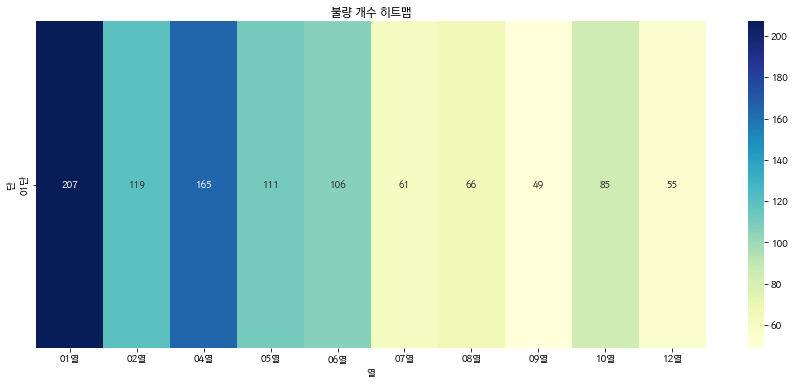

In [23]:
pivot_table_defect = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['pg1_box_dan'], columns=['pg1_box_col'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_defect, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵')
plt.xlabel('열')
plt.ylabel('단')

Powergrading 공정의 경우 등급 선별 공정으로 설비 위치에 따라 차이가 발생한다고 보기 어려움

In [24]:
cross_tab_col = pd.crosstab(df['sa1_box_col'], df['judge'])
cross_tab_row = pd.crosstab(df['sa1_box_row'], df['judge'])
cross_tab_dan = pd.crosstab(df['sa1_box_dan'], df['judge'])

In [25]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_row, p_row, dof_row, ex_row = stats.chi2_contingency(cross_tab_row)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [26]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_row))
print("{:.3f}".format(p_dan))

0.000
0.000
0.000


Text(114.84375, 0.5, '단')

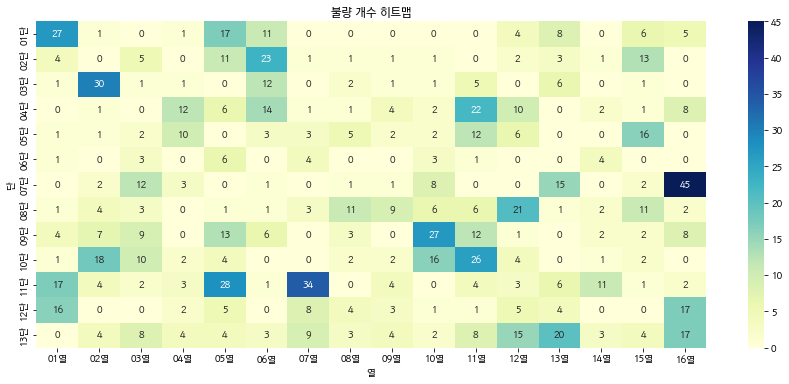

In [27]:
pivot_table_defect = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['sa1_box_dan'], columns=['sa1_box_col'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_defect, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵')
plt.xlabel('열')
plt.ylabel('단')

In [28]:
cross_tab_col = pd.crosstab(df['sa2_box_col'], df['judge'])
cross_tab_row = pd.crosstab(df['sa2_box_row'], df['judge'])
cross_tab_dan = pd.crosstab(df['sa2_box_dan'], df['judge'])

In [29]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_row, p_row, dof_row, ex_row = stats.chi2_contingency(cross_tab_row)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [30]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_row))
print("{:.3f}".format(p_dan))

0.000
0.000
0.000


Text(114.84375, 0.5, '단')

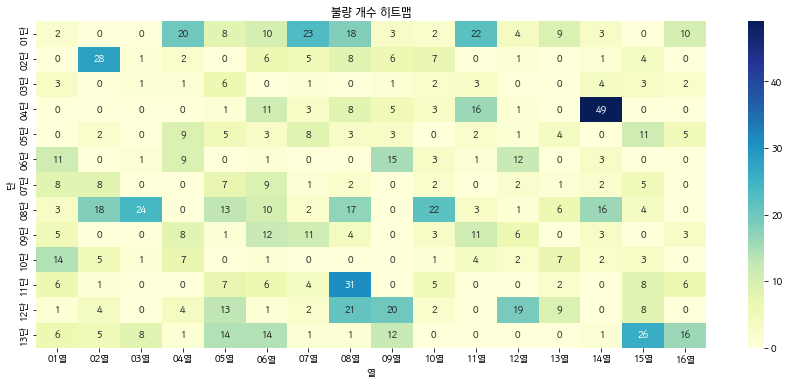

In [31]:
pivot_table_defect = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['sa2_box_dan'], columns=['sa2_box_col'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_defect, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵')
plt.xlabel('열')
plt.ylabel('단')

In [32]:
cross_tab_col = pd.crosstab(df['sa3_box_col'], df['judge'])
cross_tab_row = pd.crosstab(df['sa3_box_row'], df['judge'])
cross_tab_dan = pd.crosstab(df['sa3_box_dan'], df['judge'])

In [33]:
chi2_col, p_col, dof_col, ex_col = stats.chi2_contingency(cross_tab_col)
chi2_row, p_row, dof_row, ex_row = stats.chi2_contingency(cross_tab_row)
chi2_dan, p_dan, dof_dan, ex_dan = stats.chi2_contingency(cross_tab_dan)

In [34]:
print("{:.3f}".format(p_col))
print("{:.3f}".format(p_row))
print("{:.3f}".format(p_dan))

0.000
0.000
0.000


Text(114.84375, 0.5, '단')

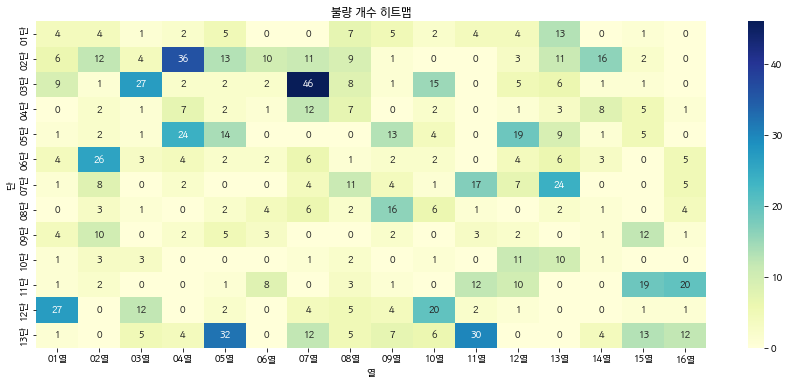

In [35]:
pivot_table_defect = pd.pivot_table(df[df['judge'] == '불량'], values='judge', 
                                    index=['sa3_box_dan'], columns=['sa3_box_col'], 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table_defect, annot=True, fmt="d", cmap="YlGnBu")
plt.title('불량 개수 히트맵')
plt.xlabel('열')
plt.ylabel('단')

### t-test

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('data_fin.csv')
df.head()

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,54연,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0


In [38]:
df['judge'].replace(['양품', '불량'], value=[0,1], inplace=True)

In [39]:
from scipy import stats
condition1 = (df['c1_box_dan'].isin(['01단', '02단', '03단', '04단']) & df['c1_box_col'].isin(['19열', '20열', '21열', '22열']))
condition2 = (df['c1_box_dan'].isin(['05단', '06단', '07단', '08단']) & df['c1_box_col'].isin(['10열', '11열', '12열', '13열']))

group_A = df[condition1]['judge']
group_B = df[condition2]['judge']

t_stat, p_value = stats.ttest_ind(group_A , group_B)

In [40]:
print("{:.3f}".format(p_value))

0.000


## 분류 분석
### Y: 불량 판정 기준

In [41]:
data = df.filter(regex='(col|row|dan|judge)$')
data.head()

,judge,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,hta1_box_row,hta1_box_dan,rta2_box_col,rta2_box_row,rta2_box_dan,...,pc1_box_dan,sa1_box_col,sa1_box_row,sa1_box_dan,sa2_box_col,sa2_box_row,sa2_box_dan,sa3_box_col,sa3_box_row,sa3_box_dan
0,0,04열,08연,04단,03열,20연,04단,07열,32연,08단,...,01단,16열,09연,04단,11열,31연,04단,16열,54연,10단
1,0,04열,08연,04단,03열,20연,04단,07열,32연,08단,...,01단,16열,09연,04단,11열,31연,04단,16열,54연,10단
2,0,04열,08연,04단,03열,20연,04단,07열,32연,08단,...,01단,16열,09연,04단,11열,31연,04단,16열,54연,10단
3,0,04열,08연,04단,03열,20연,04단,07열,32연,08단,...,01단,16열,09연,04단,11열,31연,04단,16열,54연,10단
4,0,04열,08연,04단,03열,20연,04단,07열,32연,08단,...,01단,16열,09연,04단,11열,31연,04단,16열,54연,10단


In [42]:
data = data.filter(regex="^(judge|rta1|hta1|rta2|c1)") # |sa2|sa3 일단 결측치 있어서 제외
data[data.filter(regex='col$').columns] = data[data.filter(regex='col$').columns].apply(lambda x: x.str.replace('열', '').astype(int))
data[data.filter(regex='row$').columns] = data[data.filter(regex='row$').columns].apply(lambda x: x.str.replace('연', '').astype(int))
data[data.filter(regex='dan$').columns] = data[data.filter(regex='dan$').columns].apply(lambda x: x.str.replace('단', '').astype(int))

In [43]:
data['judge'].replace(['양품','불량'], value=[0,1], inplace=True)

In [44]:
from sklearn.model_selection import train_test_split

df_x = data.drop('judge', axis=1)
df_y = data['judge']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_x, df_y, test_size = 0.3, stratify = df["judge"], random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (31019, 11)
분할 후 설명변수 데이터 :Train (21713, 11)   Test (9306, 11)


**XG 부스트**

In [45]:
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [46]:
# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier(random_state=1234)

# 모델 적합
xgboost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(df_train_x)
# 모델 평가
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(df_test_x)
# 모델 평가
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[20901    95]
 [  556   161]] 

정확도: 0.9700
정밀도: 0.6289
재현율: 0.2245
F1    : 0.3309
AUC   : 0.6100

 모델 생성 및 평가 : Test 

오차행렬:
 [[8931   68]
 [ 256   51]] 

정확도: 0.9652
정밀도: 0.4286
재현율: 0.1661
F1    : 0.2394
AUC   : 0.5793


{'rta1_box_col': 215.0, 'rta1_box_row': 428.0, 'rta1_box_dan': 220.0, 'hta1_box_col': 91.0, 'hta1_box_row': 353.0, 'hta1_box_dan': 225.0, 'rta2_box_col': 163.0, 'rta2_box_row': 394.0, 'rta2_box_dan': 208.0, 'c1_box_col': 860.0, 'c1_box_dan': 328.0}


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

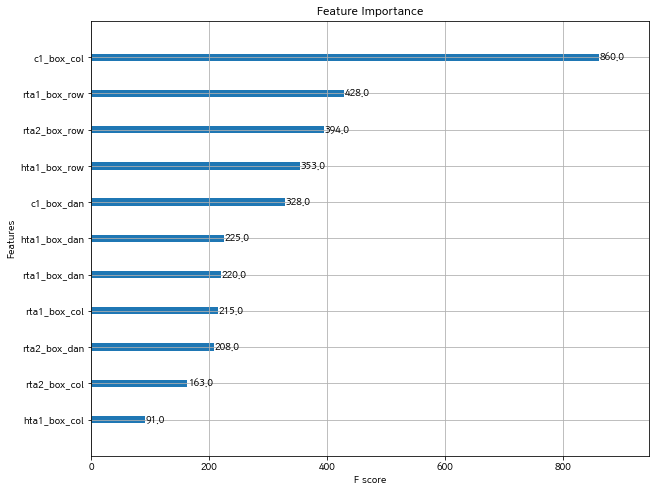

In [48]:
# 변수 중요도 확인 
import matplotlib.pyplot as plt
from xgboost import plot_importance  # F1 score 기준으로 변수 중요도 표시(변경 가능)
print(xgboost_uncust.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(xgboost_uncust, ax=ax)

**그래디언트 부스팅**

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
# 그래디언트 부스팅 모델 생성: GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier(random_state=1234)
gb_uncust.fit(df_train_x, df_train_y)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score (df_train_x, df_train_y)))
# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score (df_test_x, df_test_y)))

Accuracy on training set: 0.968
Accuracy on test set: 0.967


In [50]:
# 예측
y_pred = gb_uncust.predict(df_test_x)

# train 모델 정확도
print("Train Accuracy: {:.3f}".format(gb_uncust.score(df_train_x, df_train_y)))
# test 모델 정확도
print("Test Accuracy: {:.3f}\n".format(gb_uncust.score(df_test_x, df_test_y)))
# confusion matrix
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Train Accuracy: 0.968
Test Accuracy: 0.967

Test Confusion matrix: 
[[8992    7]
 [ 298    9]]
              precision    recall  f1-score   support

           0      0.968     0.999     0.983      8999
           1      0.562     0.029     0.056       307

    accuracy                          0.967      9306
   macro avg      0.765     0.514     0.520      9306
weighted avg      0.955     0.967     0.953      9306



In [51]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_name
df_importance ["Importance"] = gb_uncust.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
9,c1_box_col,0.279
10,c1_box_dan,0.228
1,rta1_box_row,0.110
7,rta2_box_row,0.099
4,hta1_box_row,0.083
2,rta1_box_dan,0.062
6,rta2_box_col,0.052
8,rta2_box_dan,0.040
0,rta1_box_col,0.027
5,hta1_box_dan,0.016


Text(0, 0.5, '설명변수')

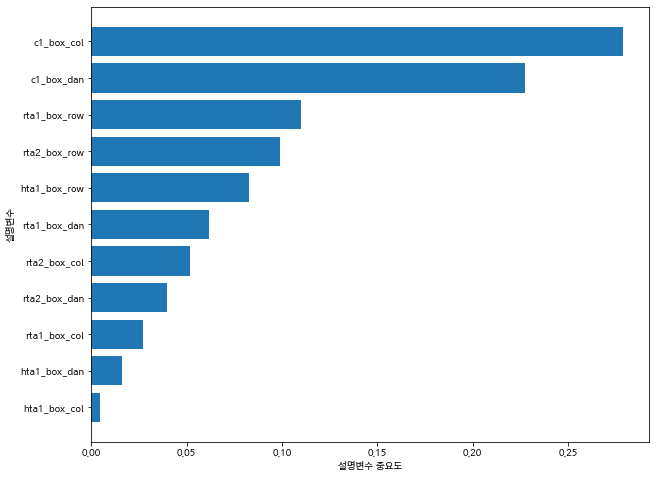

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))

df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

**랜덤포레스트**

In [53]:
from sklearn.ensemble import RandomForestClassifier
# 랜덤 포레스트 모델 생성: RandomForestClassifier
rf_uncust = RandomForestClassifier(random_state=1234)
rf_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(rf_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.970
Accuracy on test set: 0.965


In [54]:
# 평가
y_pred = rf_uncust.predict(df_test_x)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(rf_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}\n".format(rf_uncust.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accuracy on training set: 0.970
Accuracy on test set: 0.965

Confusion matrix: 
[[8930   69]
 [ 255   52]]
              precision    recall  f1-score   support

           0      0.972     0.992     0.982      8999
           1      0.430     0.169     0.243       307

    accuracy                          0.965      9306
   macro avg      0.701     0.581     0.613      9306
weighted avg      0.954     0.965     0.958      9306



In [55]:
# 변수명
v_feature_names = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance ["Feature"] = v_feature_names
df_importance ["Importance"] = rf_uncust.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance .sort_values("Importance", ascending=False, inplace = True)
df_importance .round(3)

,Feature,Importance
9,c1_box_col,0.275
10,c1_box_dan,0.122
1,rta1_box_row,0.103
7,rta2_box_row,0.092
4,hta1_box_row,0.087
8,rta2_box_dan,0.064
2,rta1_box_dan,0.063
5,hta1_box_dan,0.059
6,rta2_box_col,0.054
0,rta1_box_col,0.053


Text(0, 0.5, '설명변수')

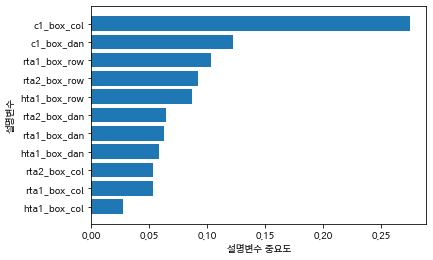

In [56]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림 
df_importance .sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance ))
plt.barh(y = coordinates, width = df_importance ["Importance"])
plt.yticks(coordinates, df_importance ["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

**의사결정 나무**

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
tree_uncust = DecisionTreeClassifier(random_state=1234 )
tree_uncust.fit(df_train_x, df_train_y)

# train 데이터 정확도
print("Accuracy on training set: {:.3f}".format(tree_uncust.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set: {:.3f}".format(tree_uncust.score(df_test_x, df_test_y)))

Accuracy on training set: 0.970
Accuracy on test set: 0.965


In [58]:
# 평가
y_pred = tree_uncust.predict(df_test_x)
print("Test Accuracy: {0:.3f}\n".format(tree_uncust.score(df_test_x, df_test_y)))
print("Test Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Test Accuracy: 0.965

Test Confusion matrix: 
[[8926   73]
 [ 253   54]]
              precision    recall  f1-score   support

           0      0.972     0.992     0.982      8999
           1      0.425     0.176     0.249       307

    accuracy                          0.965      9306
   macro avg      0.699     0.584     0.615      9306
weighted avg      0.954     0.965     0.958      9306



Text(0, 0.5, '설명변수')

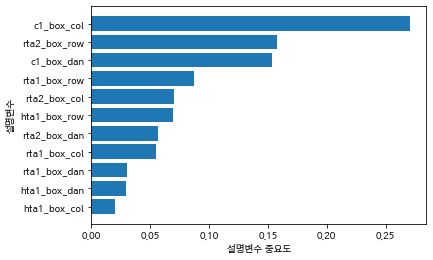

In [59]:
import matplotlib.pyplot as plt
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = tree_uncust.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### Y: 불량률 기준

In [72]:
df = pd.read_csv('data_fin.csv')

In [73]:
# 불량률 구하는 코드 참고
df['defect_rate'] = df.groupby(['lot_id', 'tray_id'])['judge'].transform(lambda x: (x == '불량').sum() / len(x))
data = df.filter(regex = '(lot_id|tray_id|defect_rate|box_col|box_row|box_dan)$')
data.drop_duplicates(subset= ['lot_id', 'tray_id'], inplace=True)

C:\Users\kseun\AppData\Local\Temp\ipykernel_2288\3857778950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset= ['lot_id', 'tray_id'], inplace=True)


In [74]:
data = data.filter(regex="^(defect_rate|rta1|hta1|rta2|c1)")
data[data.filter(regex='col$').columns] = data[data.filter(regex='col$').columns].apply(lambda x: x.str.replace('열', '').astype(int))
data[data.filter(regex='row$').columns] = data[data.filter(regex='row$').columns].apply(lambda x: x.str.replace('연', '').astype(int))
data[data.filter(regex='dan$').columns] = data[data.filter(regex='dan$').columns].apply(lambda x: x.str.replace('단', '').astype(int))

C:\Users\kseun\AppData\Local\Temp\ipykernel_2288\268464364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.filter(regex='col$').columns] = data[data.filter(regex='col$').columns].apply(lambda x: x.str.replace('열', '').astype(int))


In [76]:
from sklearn.model_selection import train_test_split

df_x = data.drop('defect_rate', axis=1)
df_y = data['defect_rate']
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_x, df_y, test_size = 0.3, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (1328, 11)
분할 후 설명변수 데이터 :Train (929, 11)   Test (399, 11)


**의사결정 나무**

In [77]:
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.999
Score on test set: -0.656


In [79]:
df_importance = pd.DataFrame()
df_importance["Feature"] =  df_train_x.columns
df_importance["Importance"] = tree_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)

Text(0, 0.5, '변수')

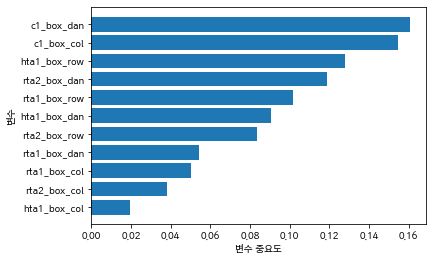

In [80]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

**랜덤 포레스트**

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.854
Score on test set: 0.021


Text(0, 0.5, '변수')

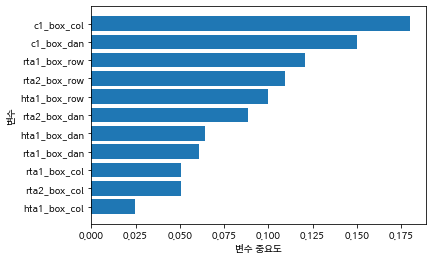

In [82]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = rf_uncustomized.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)

df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

**그래디언트 부스팅**

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)
# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score (df_train_x, df_train_y)))
# Test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score (df_test_x, df_test_y)))

Score on training set: 0.611
Score on test set: 0.003


Text(0, 0.5, '변수')

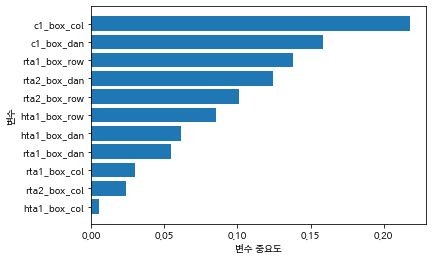

In [84]:
df_importance = pd.DataFrame()
df_importance["Feature"] = df_train_x.columns
df_importance["Importance"] = gb_uncustomized.feature_importances_
# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)

df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")